This notebook implements simple logistic regression model for learning from data.

In [38]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


Logistic regression:
input: x, output: y

Here assume linear model:
$f(x) = w^Tx+b = w^T[x,1] = w^T\tilde{x}$, where $\tilde{x}$ contains one "bias" term that remains to be "1".

fitting data: $D = \{(x_i, y_i)\}$, where $y_i\in\{0,1\}$.

simple 2D example: 

$w$ is of 2 dimension to plot more easily. We define the problem of finding the decision boundary (or classification) of the two classes in the data. The problem is defined by finding a model to fit the data for classification.

Tasks:
- draw out the 1D plots for the data points. (TODO: enable user to select points on the plot)
- Define the model. Visualize the logistic values. Visualize the prediction. Visualize the decision boundary.
- Optimize the model. Visualize the effects as the model is optimized.
  - implement the cost computation
  - implement the gradient computation
- visualize the cost landscape. The cost change.

"
**If have time:**
obtaining data from: 

https://www.kaggle.com/code/prashant111/logistic-regression-classifier-tutorial/input
https://www.kaggle.com/datasets/trisha2094/weatheraus


simple example: 1D data classification

<Axes: >

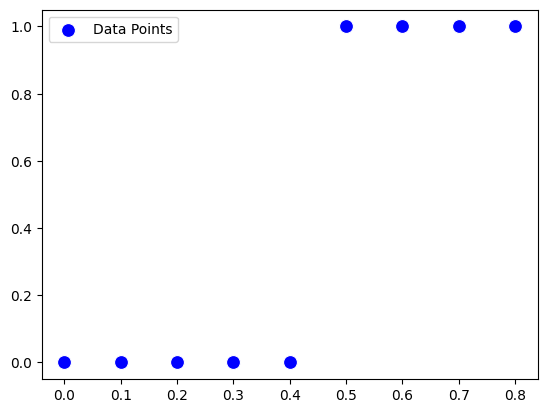

In [39]:
# data: (x, y), where y is binary (0 or 1)
data = [
    ([0.0], 0),
    ([0.1], 0),
    ([0.2], 0),
    ([0.3], 0),
    ([0.4], 0),
    ([0.5], 1),
    ([0.6], 1),
    ([0.7], 1),
    ([0.8], 1),
]

# plot the data
xs = [x[0] for x, y in data]
xs = np.array(xs).reshape(-1, 1)
ys = [y for x, y in data]
ys = np.array(ys).reshape(-1)
sns.scatterplot(x=xs.flatten(), y=ys, s=100, color='blue', label='Data Points')

In [40]:
# define the model:
# f(x) gives the probability of x being of class 1
# f(x) = 1 / (1 + exp(-z(x)))
# z(x) gives the model for obtaining the input to the sigmoid function.
# here we use linear model: z(x) = w*x + b = w*tilde(x)

class Model:
    def __init__(self, w):
        """
        parameter size: 2
        """
        self.w = w

    def predict(self, x):
        """
        input: size of Nx1
        ouput: the class of each input
        """
        pred = self.predict_logistics(x)
        classes = np.zeros((pred.shape)).astype(int)
        classes[pred>0.5] = 1
        return classes

    def predict_logistics(self, x):
        """
        input: size of Nx1
        ouput: the probability of x being of class 1
        """
        return self.sigmoid(self.model(x))

    def model(self, x):
        """
        input: size of Nx1
        output: the input to sigmoid function
        """
        # print('x: ')
        # print(x)
        x_tilde = np.zeros((x.shape[0], 2))
        x_tilde[:,0] = x[:,0]
        x_tilde[:,1] = 1.0
        return x_tilde.dot(self.w)

    def sigmoid(self, x):
        """
        input: size of N
        output: 1/(1+exp(-x))
        """
        return 1.0 / (1 + np.exp(-x))

    def loss(self, x, y):
        """
        input:
        - x: size of Nx1
        - y: size of N (label of 0 or 1)
        output:
        - mean of the loss (a single float scalar)
        max likelihood ~ min sum of loglikelihood

        L_i = -log P(y|x; w) = -y log(f(x,w)) - (1-y) log(1-f(x,w))
        """
        logistics = self.predict_logistics(x)
        L = - y * np.log(logistics) - (1-y) * np.log(1-logistics)
        return np.mean(L)

    def gradient(self, x, y):
        """
        input:
        - x: size of Nx1
        - y: size of N (label of 0 or 1)
        output:
        - gradient of the loss w.r.t. w  (size of 2)

        grad_i = -y*(1-f(x))*x + (1-y)*f(x)*x = (f(x)-y) * x
        """
        res = self.predict_logistics(x) - y
        res = res.reshape((len(x),1))
        x_tilde = np.zeros((x.shape[0], 2))
        x_tilde[:,0] = x[:,0]
        x_tilde[:,1] = 1.0
        res = res * x_tilde
        return np.mean(res, axis=0)

    def optimize_i(self, x, y, lr=0.001):
        """
        input:
        - x: size of Nx1
        - y: size of N (label of 0 or 1)

        optimize the parameter (w) using one iteration
        """
        grad = self.gradient(x, y)
        self.w = self.w - lr*grad

    def optimize(self, x, y, lr=0.001, n_iter=10):
        """
        input:
        - x: size of Nx1
        - y: size of N (label of 0 or 1)

        optimize the parameter (w) with pre-defined iterations
        another choice: optimize until the loss stabilizes or does not go down anymore
        """
        for i in range(n_iter):
            self.optimize_i(x, y, lr=lr)


<Axes: >

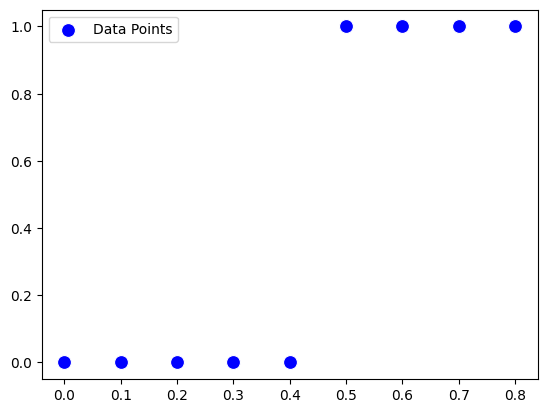

In [41]:
# validation of the model: train on a small subset of the data and visualize the result
data = [
    ([0.0], 0),
    ([0.1], 0),
    ([0.2], 0),
    ([0.3], 0),
    ([0.4], 0),
    ([0.5], 1),
    ([0.6], 1),
    ([0.7], 1),
    ([0.8], 1),
]

# plot the data
data_x = [x[0] for x, y in data]
data_x = np.array(data_x).reshape(-1, 1)
data_y = [y for x, y in data]
data_y = np.array(data_y).reshape(-1)
sns.scatterplot(x=data_x.flatten(), y=data_y, s=100, color='blue', label='Data Points')

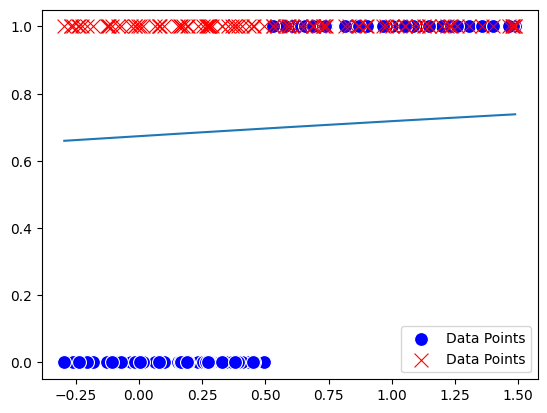

In [53]:
# code for plotting the prediction results comparing against the training dataset
# visualize the labels and the logistics values

def visualize_model(x, y, model):
    """
    x shape: Nx1
    y shape: N
    """
    sns.scatterplot(x=x.flatten(), y=y, s=100, color='blue', label='Data Points')
    sns.scatterplot(x=x.flatten(), y=model.predict(x), s=100, marker='x', color='red', label='Data Points')
    # plot the logistics values
    xmin = x.min()
    xmax = x.max()
    resol = 0.01 # plot resolution
    n_points = int(np.ceil((xmax-xmin) / resol))
    logistics_xs = np.linspace(start=xmin, stop=xmax, num=n_points).reshape((-1,1))
    sns.lineplot(x=logistics_xs.flatten(), y=model.predict_logistics(logistics_xs))

logistics_model = Model(np.random.random((2)))
visualize_model(data_x, data_y, logistics_model)

previous w:  [0.92246965 0.1668495 ]
afterward w:  [ 8.22843204 -3.65483333]


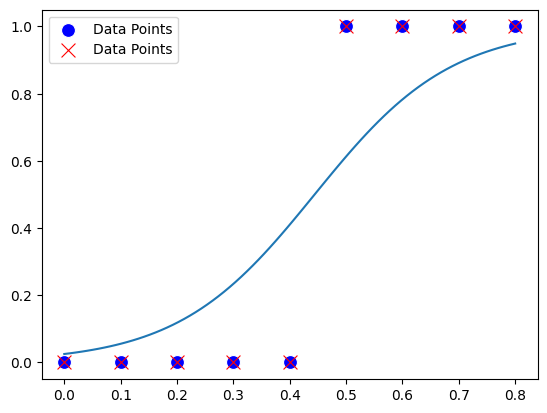

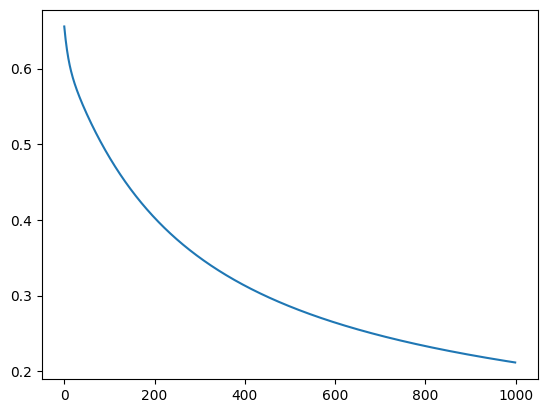

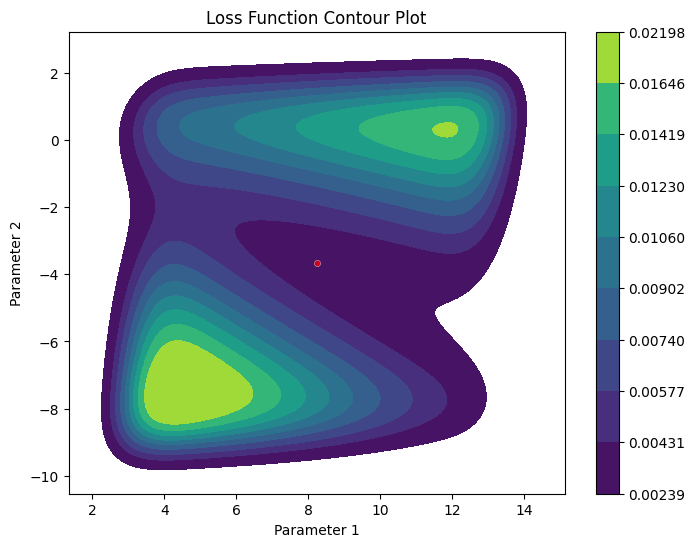

In [44]:
# visualize how the model is updated over time
logistics_model.w = np.random.random(2)
losses = []
print('previous w: ', logistics_model.w)
for i in range(1000):
    logistics_model.optimize_i(x=data_x, y=data_y, lr=0.2)
    loss = logistics_model.loss(x=data_x, y=data_y)
    losses.append(loss)
    # plt.clf()
print('afterward w: ', logistics_model.w)
visualize_model(data_x, data_y, logistics_model)
plt.figure()
sns.lineplot(x=np.arange(len(losses)), y=losses)

w = np.array(logistics_model.w)

# plot the cost contour
w1 = np.linspace(w[0]-5, w[0]+5, 100)
w2 = np.linspace(w[1]-5, w[1]+5, 100)
X, Y = np.meshgrid(w1, w2)
shape = X.shape

X = X.flatten()
Y = Y.flatten()
Z = []
for i in range(len(X)):
    logistics_model.w = np.array([X[i], Y[i]])
    Z.append(logistics_model.loss(x=data_x, y=data_y))
Z = np.array(Z)

plt.figure(figsize=(8, 6))
sns.kdeplot(x=X, y=Y, weights=Z, levels=10, cmap="viridis", fill=True, cbar=True)
sns.scatterplot(x=[w[0]], y=[w[1]], s=20, color='red', alpha=0.7)
plt.title("Loss Function Contour Plot")
plt.xlabel("Parameter 1")
plt.ylabel("Parameter 2")
plt.show()

more complex problem: assuming the data is split at a decision boundary.

In [ ]:
decision_boudary = 0.5
xmin = -20
xmax = 20
n_data = 100
data_x = np.random.uniform(low=xmin, high=xmax, size=(n_data, 1))
data_y = np.zeros((n_data)).astype(int)
data_y[data_x[:,0]<decision_boudary] = 0
data_y[data_x[:,0]>decision_boudary] = 1

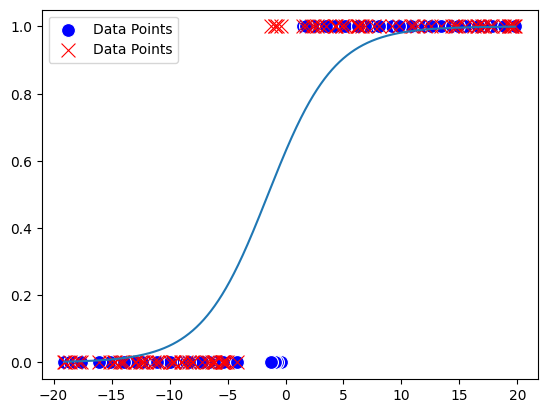

In [69]:
logistics_model = Model(np.random.random((2)))
logistics_model.predict(data_x)
visualize_model(data_x, data_y, logistics_model)

data preparation:
- split the data into training set, validation set, and testing set
- do pre-processing if necessary

the training process:
- train the model on training set, and monitor the loss on training set and validation set. visualize the training loss and validation loss

training loss vs validation loss:
- things that could cause overfitting:
  - dataset problem: not IID, and not exhaustive enough (scattered data, or sparse data does not help with training and capturing the model)
    - data size and exhaustiveness
    - IID
  - training procedure problem: overfitting when training too "much"
    - check the validation loss to decide when to stop

In [70]:
# data prepration: split the data, 5:2:3
training_size = int(np.ceil(len(data_x) * 0.5))
validation_size = int(np.ceil(len(data_x) * 0.2))
test_size = len(data_x) - training_size - validation_size
shuffle_indices = np.random.permutation(len(data_x))
shuffled_x = data_x[shuffle_indices]
shuffled_y = data_y[shuffle_indices]
training_x = shuffled_x[:training_size]
training_y = shuffled_y[:training_size]
validation_x = shuffled_x[training_size:training_size+validation_size]
validation_y = shuffled_y[training_size:training_size+validation_size]
testing_x = shuffled_x[-test_size:]
testing_y = shuffled_y[-test_size:]

In [73]:
from tqdm.notebook import tqdm, trange


previous w:  [0.2349842  0.48876949]


  0%|          | 0/100000 [00:00<?, ?it/s]

/tmp/ipykernel_47493/1758023597.py:62: RuntimeWarning: divide by zero encountered in log
  L = - y * np.log(logistics) - (1-y) * np.log(1-logistics)
/tmp/ipykernel_47493/1758023597.py:62: RuntimeWarning: invalid value encountered in multiply
  L = - y * np.log(logistics) - (1-y) * np.log(1-logistics)


afterward w:  [ 6.24885145 -2.04474761]


/tmp/ipykernel_47493/1758023597.py:62: RuntimeWarning: divide by zero encountered in log
  L = - y * np.log(logistics) - (1-y) * np.log(1-logistics)
/tmp/ipykernel_47493/1758023597.py:62: RuntimeWarning: invalid value encountered in multiply
  L = - y * np.log(logistics) - (1-y) * np.log(1-logistics)


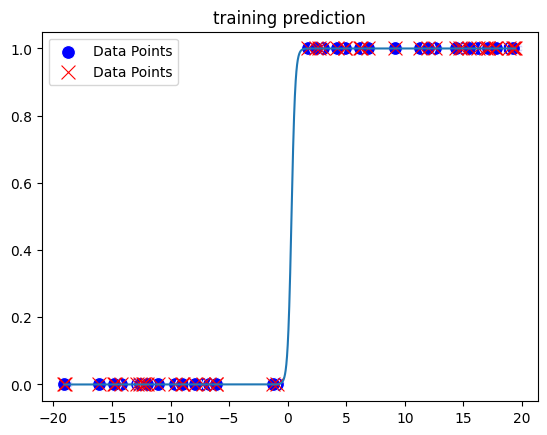

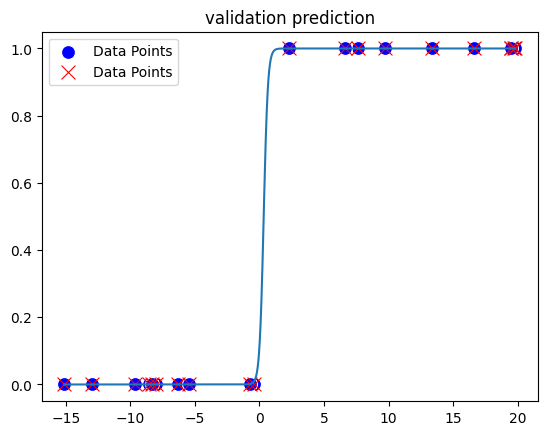

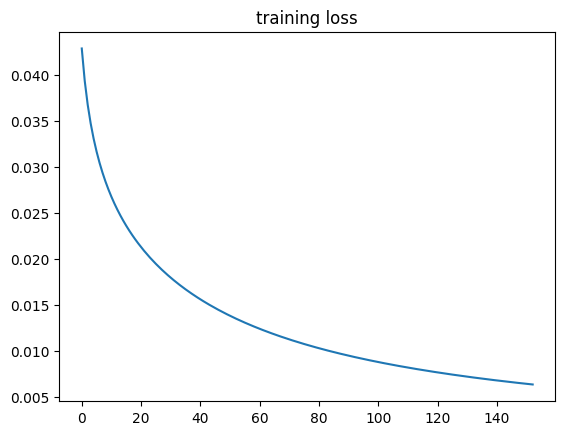

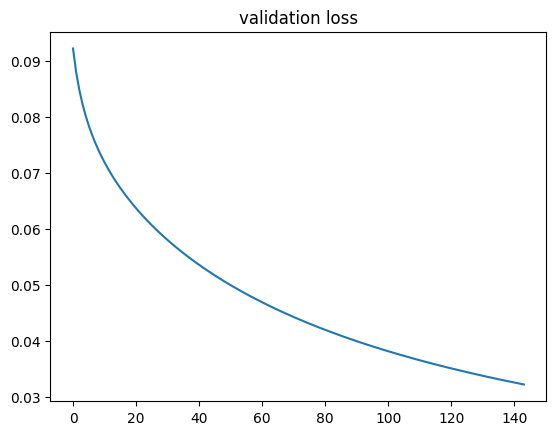

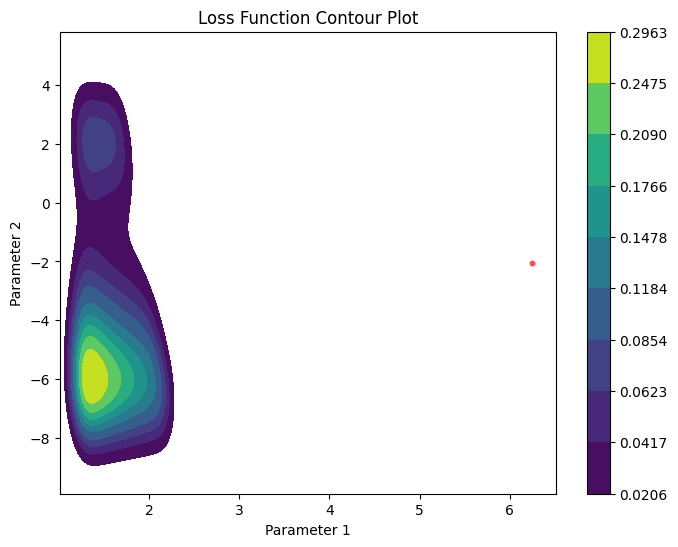

In [74]:
# visualize how the model is updated over time
logistics_model.w = np.random.random(2)
training_losses = []
validation_losses = []
print('previous w: ', logistics_model.w)
for i in trange(100000):
    logistics_model.optimize_i(x=training_x, y=training_y, lr=0.5)
    loss = logistics_model.loss(x=training_x, y=training_y)
    training_losses.append(loss)
    loss = logistics_model.loss(x=validation_x, y=validation_y)
    validation_losses.append(loss)
    # plt.clf()
print('afterward w: ', logistics_model.w)
visualize_model(training_x, training_y, logistics_model)
plt.title("training prediction")
plt.figure()
visualize_model(validation_x, validation_y, logistics_model)
plt.title("validation prediction")

plt.figure()
sns.lineplot(x=np.arange(len(training_losses)), y=training_losses)
plt.title("training loss")

plt.figure()
sns.lineplot(x=np.arange(len(validation_losses)), y=validation_losses)
plt.title("validation loss")


w = np.array(logistics_model.w)

# plot the cost contour
w1 = np.linspace(w[0]-5, w[0]+5, 100)
w2 = np.linspace(w[1]-5, w[1]+5, 100)
X, Y = np.meshgrid(w1, w2)
shape = X.shape

X = X.flatten()
Y = Y.flatten()
Z = []
for i in range(len(X)):
    logistics_model.w = np.array([X[i], Y[i]])
    Z.append(logistics_model.loss(x=data_x, y=data_y))
Z = np.array(Z)

plt.figure(figsize=(8, 6))
sns.kdeplot(x=X, y=Y, weights=Z, levels=10, cmap="viridis", fill=True, cbar=True)
sns.scatterplot(x=[w[0]], y=[w[1]], s=20, color='red', alpha=0.7)
plt.title("Loss Function Contour Plot")
plt.xlabel("Parameter 1")
plt.ylabel("Parameter 2")
plt.show()

In [ ]:
# * training on the trianing set, and validation the model on the validation set.
# * visualize the loss


In [118]:
# load the dataset
df = pd.read_csv("weatherAUS.csv")